# BINARY CLASSIFICATION

##### XGBoost model 
##### annotation result 0, 1 (binary classification)
##### 결측치 mean()
##### class 비율에 따라 weights 적용

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('judge 제거_LCE.csv')

In [16]:
#import missingno as msno
#msno.bar(df)

In [17]:
df = df.dropna(axis=1, thresh=1)

## Preprocessing
#### 1. annotation result = 3, Null drop

In [18]:
# annotation result = 0, 1, 2 만 남기고 확인 

null_annot = list(np.where(df['annotation_result'].isna() == True)[0])
df = df.drop(null_annot, axis = 'index')
df.index = range(len(df))

three_annot = list(np.where(df['annotation_result'] == 3)[0])
df = df.drop(three_annot, axis = 'index')
df.index = range(len(df))

df['annotation_result'].unique()

array([1., 0., 2.])

In [19]:
zero = list(np.where(df['annotation_result'] == 0)[0])
one = list(np.where(df['annotation_result'] == 1)[0])
two = list(np.where(df['annotation_result'] == 2)[0])
df['annotation_result'][zero] = 0
df['annotation_result'][one] = 0
df['annotation_result'][two] = 1

df['annotation_result'].unique()

array([0., 1.])

## 결측치 mean(), train, test split

In [20]:
df = df.fillna(df.mean())

#최빈값
#df = df.fillna(df.mode().iloc[0])
#df

#중앙값
#df = df.fillna(df.median().iloc[0])
#df

In [21]:
# Select all columns except certain columns
X = df.iloc[:,7:]
y = np.ravel(df.loc[:, ['annotation_result']])

from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Training set:  (1427, 70) (1427,)
Test set:  (357, 70) (357,)


## Scaler 적용 

In [22]:
# 1. Standard Scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, scale

# Initialize the StandardScaler
#standard_scaler = StandardScaler()
# Fit the scaler on the training data
#standard_scaler.fit(X_train)
# Scale the training, validation, and test data using the scaler
#X_train_standard = standard_scaler.transform(X_train)
#X_val_standard = standard_scaler.transform(X_val)
#X_test_standard = standard_scaler.transform(X_test)


# 2. Initialize the RobustScaler
robust_scaler = RobustScaler()
# Scale the training, validation, and test data using the scaler
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

# ORIGINAL model

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       271
         1.0       0.73      0.42      0.53        86

    accuracy                           0.82       357
   macro avg       0.79      0.69      0.71       357
weighted avg       0.81      0.82      0.80       357



Text(0.5, 1.0, 'All + Original model')

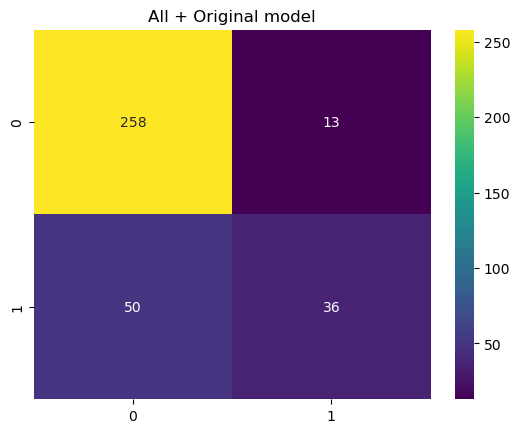

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_original = XGBClassifier()
model_original.fit(X_train, y_train)

y_pred = model_original.predict(X_test)

# classification report 출력
print(classification_report(y_test, y_pred))

# confusion matrix 출력
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='viridis')
plt.title("All + Original model")

## Class weights model

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       271
         1.0       0.71      0.49      0.58        86

    accuracy                           0.83       357
   macro avg       0.78      0.71      0.74       357
weighted avg       0.82      0.83      0.82       357



Text(0.5, 1.0, 'All + Class weights model')

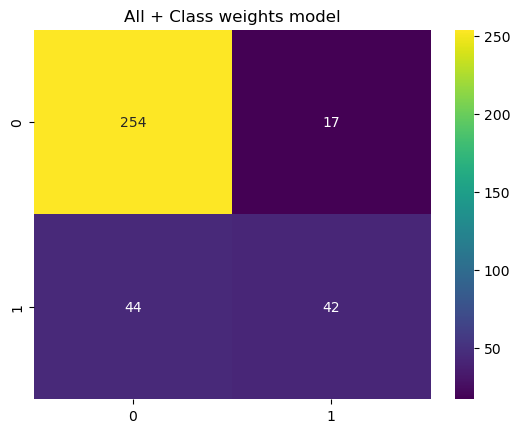

In [24]:
pos_ratio = sum(y_train == 0) / sum(y_train == 1)

# XGBoost 모델 인스턴스화
model_weights = XGBClassifier(
    scale_pos_weight = pos_ratio
)

model_weights.fit(X_train, y_train)

y_pred_weights = model_weights.predict(X_test)

print(classification_report(y_test, y_pred_weights))

cm = confusion_matrix(y_test, y_pred_weights)
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'viridis')
plt.title("All + Class weights model")

## 의학적으로 중요하다고 판단되는 features만 selection

In [30]:
# Select all columns except certain columns
X_MED = df.loc[:,['H103','X106','X105','X103','X104','X102','T102','L620','L621','T103','L622','L623',
              'P006','N817','C408','E512','S469','H105','H121','C102','C110','C104','C119',
             'C120','C121','C122','C401','E406','E403','Z977','C153','K087','K086','E427','C404',
             'L464']]
y_MED = np.ravel(df.loc[:, ['annotation_result']])

from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train_MED, X_test_MED, y_train_MED, y_test_MED = train_test_split(X_MED, y_MED, test_size=0.2, random_state=42)

print("Training set: ", X_train_MED.shape, y_train_MED.shape)
print("Test set: ", X_test_MED.shape, y_test_MED.shape)

Training set:  (1427, 36) (1427,)
Test set:  (357, 36) (357,)


## Scaler

In [31]:
# 1. Standard Scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, scale

# Initialize the StandardScaler
#standard_scaler = StandardScaler()
# Fit the scaler on the training data
#standard_scaler.fit(X_train)
# Scale the training, validation, and test data using the scaler
#X_train_standard = standard_scaler.transform(X_train)
#X_val_standard = standard_scaler.transform(X_val)
#X_test_standard = standard_scaler.transform(X_test)


# 2. Initialize the RobustScaler
robust_scaler = RobustScaler()
# Scale the training, validation, and test data using the scaler
X_train_MED = robust_scaler.fit_transform(X_train_MED)
X_test_MED = robust_scaler.transform(X_test_MED)

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       271
         1.0       0.71      0.40      0.51        86

    accuracy                           0.82       357
   macro avg       0.77      0.67      0.70       357
weighted avg       0.80      0.82      0.79       357



Text(0.5, 1.0, 'MED + Class weights model')

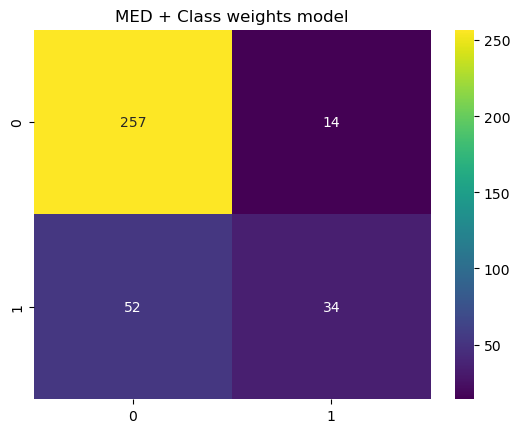

In [32]:
# XGBoost 모델 인스턴스화
model_MED = XGBClassifier()

# 모델 학습 시 class_weight에 class_weights를 전달
model_MED.fit(X_train_MED, y_train_MED)

y_pred_MED = model_MED.predict(X_test_MED)

print(classification_report(y_test_MED, y_pred_MED))

cm = confusion_matrix(y_test_MED, y_pred_MED)
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'viridis')
plt.title("MED + Class weights model")

# Med Selection + Class weights model 

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       271
         1.0       0.71      0.40      0.51        86

    accuracy                           0.82       357
   macro avg       0.77      0.67      0.70       357
weighted avg       0.80      0.82      0.79       357



Text(0.5, 1.0, 'MED + Class weights model')

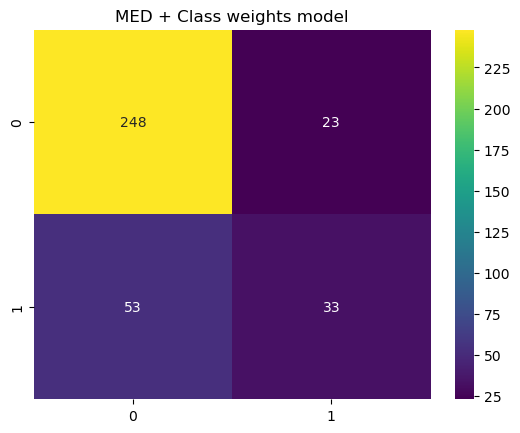

In [34]:
pos_ratio = sum(y_train_MED == 0) / sum(y_train_MED == 1)

# XGBoost 모델 인스턴스화
model_MED_WT = XGBClassifier(
    scale_pos_weight = pos_ratio
)

# 모델 학습 시 class_weight에 class_weights를 전달
model_MED_WT.fit(X_train_MED, y_train_MED)

y_pred_MED_WT = model_MED_WT.predict(X_test_MED)

print(classification_report(y_test_MED, y_pred_MED))

cm = confusion_matrix(y_test_MED, y_pred_MED_WT)
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'viridis')
plt.title("MED + Class weights model")

## AUROC 

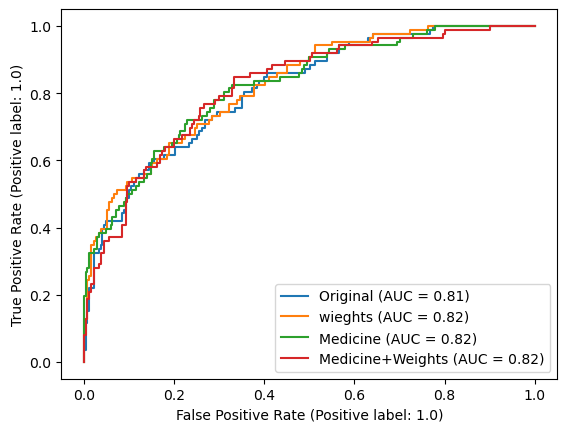

In [37]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, RocCurveDisplay 

fig, ax = plt.subplots()

plot_roc_curve(model_original, X_test, y_test, ax=ax, name = 'Original')
plot_roc_curve(model_weights, X_test, y_test, ax=ax, name = 'wieghts')
plot_roc_curve(model_MED, X_test_MED, y_test_MED, ax=ax, name = 'Medicine')
plot_roc_curve(model_MED_WT, X_test_MED, y_test_MED, ax=ax, name = 'Medicine+Weights')

plt.show()